In [1]:
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from config import fed_ley
import requests
import json
from datetime import datetime

In [22]:
tickers_ratios = pd.DataFrame(columns = ["date", "symbol", 
                                          "period", "priceEarningsRatio", "priceEarningsToGrowthRatio"])
tickers3 = ["AAPL", "GOOG", "AMZN"]
prep_key = "b4fe65382da39adf450a1bdfc846fd2e"
for name in tickers3:
    query_url = f"https://financialmodelingprep.com/api/v3/ratios/{name}?period=quarter&limit=43&apikey={prep_key}"
    ratios_response = requests.get(query_url).json()
    tickers_ratio_response = pd.json_normalize(ratios_response)
    tickers_ratio_response["symbol"] = name
    tickers_ratio_response = tickers_ratio_response[["date", "symbol", 
                                          "period", "priceEarningsRatio", "priceEarningsToGrowthRatio"]]
    tickers_ratios= pd.concat([tickers_ratios,tickers_ratio_response])
tickers_ratios.columns=["Date", "Ticker", "Period", "PE", "PEG"]
#print(tickers_ratios)

#Create copy that won't affect original
ticker_ratios = tickers_ratios.copy(deep=True)
#print(fiscal_qbs)

#Create separate dataframe based on symbols
aapl_ratios = ticker_ratios[ticker_ratios["Ticker"] == "AAPL"]
aapl_ratios = pd.DataFrame(aapl_ratios)
aapl_ratios =aapl_ratios.sort_values("Date", ascending=True)

amzn_ratios = ticker_ratios[ticker_ratios["Ticker"] == "AMZN"]
amzn_ratios = pd.DataFrame(amzn_ratios)

goog_ratios = ticker_ratios[ticker_ratios["Ticker"] == "GOOG"]
goog_ratios = pd.DataFrame(goog_ratios)
#goog_ratios.head()
aapl_ratios.tail()

,Date,Ticker,Period,PE,PEG
4,2021-09-25,AAPL,Q4,29.466787,-6.433582
3,2021-12-25,AAPL,Q1,21.339298,0.310164
2,2022-03-26,AAPL,Q2,28.628169,-1.041473
1,2022-06-25,AAPL,Q3,29.441966,-1.365037
0,2022-09-24,AAPL,Q4,29.094279,3.879237


In [25]:
tickers3 = ["AAPL", "GOOG", "AMZN"]

dum_fiscal_qis = pd.DataFrame(columns = ["date", "symbol", "fillingDate", "calendarYear", 
                                          "period", "eps"])

prep_key = "b4fe65382da39adf450a1bdfc846fd2e"
for name in tickers3:
    query_url = f"https://financialmodelingprep.com/api/v3/income-statement/{name}?period=quarter&limit=43&apikey={prep_key}"
    fiscal_response = requests.get(query_url).json()
    fiscal_yearqis = pd.json_normalize(fiscal_response)
    fiscal_yearqis["symbol"] = name
    fiscal_yearqis = fiscal_yearqis[["date", "symbol", "fillingDate", "calendarYear", 
                                          "period", "eps"]]
    dum_fiscal_qis= pd.concat([dum_fiscal_qis,fiscal_yearqis])
dum_fiscal_qis.columns=["Date", "Ticker", "Filing Date", "Fiscal Year", "Period", "EPS"]
#print(dum_fiscal_yearqis)
#Create copy that won't affect original
fiscal_yearsqis = dum_fiscal_qis.copy(deep=True)

#fiscal_years
#Create separate dataframe based on symbols
aapl_qis = fiscal_yearsqis[fiscal_yearsqis["Ticker"] == "AAPL"]
aapl_qis = pd.DataFrame(aapl_qis)
#print(aapl_fiscal_year.head())
amzn_qis = fiscal_yearsqis[fiscal_yearsqis["Ticker"] == "AMZN"]
amzn_qis = pd.DataFrame(amzn_qis)
#print(amzn_fiscal_year.head())
goog_qis = fiscal_yearsqis[fiscal_yearsqis["Ticker"] == "GOOG"]
goog_qis = pd.DataFrame(goog_qis)
#fiscal_yearsqis
quarterly_pe_eps = fiscal_yearsqis.merge(ticker_ratios, on=["Date", "Ticker"], how='left')
del quarterly_pe_eps["Period_y"]
del quarterly_pe_eps["Filing Date"]
quarterly_pe_eps.rename(columns = {'Period_x':'Period'}, inplace = True)
quarterly_pe_eps['Date'] = pd.to_datetime(quarterly_pe_eps['Date'])
aapl_pe_eps = quarterly_pe_eps[quarterly_pe_eps["Ticker"] == "AAPL"]
aapl_pe_eps = pd.DataFrame(aapl_pe_eps)
amzn_pe_eps = quarterly_pe_eps[quarterly_pe_eps["Ticker"] == "AMZN"]
amzn_pe_eps = pd.DataFrame(amzn_pe_eps)
goog_pe_eps = quarterly_pe_eps[quarterly_pe_eps["Ticker"] == "GOOG"]
goog_pe_eps = pd.DataFrame(goog_pe_eps)
#goog_pe_eps

,Date,Ticker,Fiscal Year,Period,EPS,PE,PEG
0,2022-09-24,AAPL,2022,Q4,1.290000,29.094279,3.879237
1,2022-06-25,AAPL,2022,Q3,1.200000,29.441966,-1.365037
2,2022-03-26,AAPL,2022,Q2,1.530000,28.628169,-1.041473
3,2021-12-25,AAPL,2022,Q1,2.110000,21.339298,0.310164
4,2021-09-25,AAPL,2021,Q4,1.250000,29.466787,-6.433582
...,...,...,...,...,...,...,...
124,2013-03-31,AMZN,2013,Q1,0.008855,362.904105,-23.168198
125,2012-12-31,AMZN,2012,Q4,0.010500,290.548416,2.148145
126,2012-09-30,AMZN,2012,Q3,-0.029783,-103.931132,0.026001
127,2012-06-30,AMZN,2012,Q2,0.000764,3678.065910,-38.883531


In [50]:
tickers = ["AAPL", "GOOG", "AMZN"]
dummym = pd.DataFrame(columns = ["ticker", "c", "t"])
for name in tickers:
    url = f"https://api.polygon.io/v2/aggs/ticker/{name}/range/1/month/2012-01-01/2022-10-22?adjusted=true&sort=asc&apiKey={api_key}"
    response = requests.get(url).json()
    datadata = pd.json_normalize(response["results"])
    datadata["ticker"] = name
    datadata = datadata[["ticker","c", "t"]]
    dummym = pd.concat([dummym, datadata])
dummym.columns = ["ticker", "close", "date"]

dummym['date'] = pd.to_datetime(dummym['date'],unit='ms')
dummym["date"] = pd.to_datetime(dummym["date"]).dt.date

aapl_monthly = dummym[dummym["ticker"] == "AAPL"]
aapl_monthly = pd.DataFrame(aapl_monthly)
aapl_monthly

,ticker,close,date
0,AAPL,20.9029,2012-11-01
1,AAPL,19.0062,2012-12-01
2,AAPL,16.2675,2013-01-01
3,AAPL,15.7643,2013-02-01
4,AAPL,15.8093,2013-03-01
...,...,...,...
115,AAPL,136.7200,2022-06-01
116,AAPL,162.5100,2022-07-01
117,AAPL,157.2200,2022-08-01
118,AAPL,138.2000,2022-09-01


In [62]:
tickers = ["AAPL", "GOOG", "AMZN"]
dummysd20 = pd.DataFrame(columns = ["ticker", "timestamp", "value"])
for name in tickers:
    url = f"https://api.polygon.io/v1/indicators/sma/{name}?timespan=month&adjusted=true&window=20&series_type=close&order=asc&limit=120&apiKey={api_key}"
    response = requests.get(url).json()
    datadata = pd.json_normalize(response["results"]["values"])
    datadata["ticker"] = name
    datadata["window"] = 20
    #datadata = datadata[[ "timestamp", "value"]]
    dummysd20 = pd.concat([dummysd20, datadata])

dummysd20['timestamp'] = pd.to_datetime(dummysd20['timestamp'],unit='ms')
dummysd20["timestamp"] = pd.to_datetime(dummysd20["timestamp"]).dt.date
dummysd20.rename(columns = {'timestamp':'date'}, inplace = True)
dummysd20.rename(columns = {'value':'20SMA'}, inplace = True)
aapl_monthly_sma = dummysd20[dummysd20["ticker"] == "AAPL"]
aapl_monthly_sma = pd.DataFrame(aapl_monthly_sma)
print(dummysd20)

    ticker        date       20SMA  window
0     AAPL  2014-06-01   18.284855    20.0
1     AAPL  2014-07-01   18.434710    20.0
2     AAPL  2014-08-01   18.765650    20.0
3     AAPL  2014-09-01   19.211650    20.0
4     AAPL  2014-10-01   19.773435    20.0
..     ...         ...         ...     ...
96    AMZN  2022-06-01  156.456975    20.0
97    AMZN  2022-07-01  155.284375    20.0
98    AMZN  2022-08-01  153.480550    20.0
99    AMZN  2022-09-01  151.115050    20.0
100   AMZN  2022-10-01  148.553225    20.0

[303 rows x 4 columns]


In [63]:
tickers = ["AAPL", "GOOG", "AMZN"]
dummysd50 = pd.DataFrame(columns = ["ticker", "timestamp", "value"])
for name in tickers:
    url = f"https://api.polygon.io/v1/indicators/sma/{name}?timespan=month&adjusted=true&window=50&series_type=close&order=asc&limit=120&apiKey={api_key}"
    response = requests.get(url).json()
    datadata = pd.json_normalize(response["results"]["values"])
    datadata["ticker"] = name
    datadata["window"] = 20
    #datadata = datadata[[ "timestamp", "value"]]
    dummysd50 = pd.concat([dummysd50, datadata])

dummysd50['timestamp'] = pd.to_datetime(dummysd50['timestamp'],unit='ms')
dummysd50["timestamp"] = pd.to_datetime(dummysd50["timestamp"]).dt.date
dummysd50.rename(columns = {'timestamp':'date'}, inplace = True)
dummysd50.rename(columns = {'value':'50SMA'}, inplace = True)
aapl_monthly_sma50 = dummysd50[dummysd50["ticker"] == "AAPL"]
aapl_monthly_sma50 = pd.DataFrame(aapl_monthly_sma50)
print(dummysd50)

   ticker        date       50SMA  window
0    AAPL  2016-12-01   23.963668    20.0
1    AAPL  2017-01-01   24.152360    20.0
2    AAPL  2017-02-01   24.457186    20.0
3    AAPL  2017-03-01   24.850136    20.0
4    AAPL  2017-04-01   25.253100    20.0
..    ...         ...         ...     ...
66   AMZN  2022-06-01  124.352220    20.0
67   AMZN  2022-07-01  125.421600    20.0
68   AMZN  2022-08-01  126.257200    20.0
69   AMZN  2022-09-01  126.739760    20.0
70   AMZN  2022-10-01  126.795250    20.0

[213 rows x 4 columns]


In [74]:
merge_1 = dummym.merge(dummysd20, on=['date',"ticker"], how='left')
merge_final = merge_1.merge(dummysd50, on=["date","ticker"], how="left")
merge_final
del merge_final["window_x"]
del merge_final["window_y"]
merge_final

aapl_monthly = merge_final[merge_final["ticker"] == "AAPL"]
aapl_monthly = pd.DataFrame(aapl_monthly)
amzn_monthly = merge_final[merge_final["ticker"] == "AMZN"]
amzn_monthly = pd.DataFrame(amzn_monthly)
goog_monthly = merge_final[merge_final["ticker"] == "GOOG"]
goog_monthly = pd.DataFrame(goog_monthly)

#rename columns
aapl_monthly.rename(columns = {'close':'AAPL monthly'}, inplace = True)
amzn_monthly.rename(columns = {'close':'AMZN monthly'}, inplace = True)
goog_monthly.rename(columns = {'close':'GOOG monthly'}, inplace = True)
aapl_monthly.head()

,ticker,AAPL monthly,date,20SMA,50SMA
0,AAPL,20.9029,2012-11-01,NaN,NaN
1,AAPL,19.0062,2012-12-01,NaN,NaN
2,AAPL,16.2675,2013-01-01,NaN,NaN
3,AAPL,15.7643,2013-02-01,NaN,NaN
4,AAPL,15.8093,2013-03-01,NaN,NaN


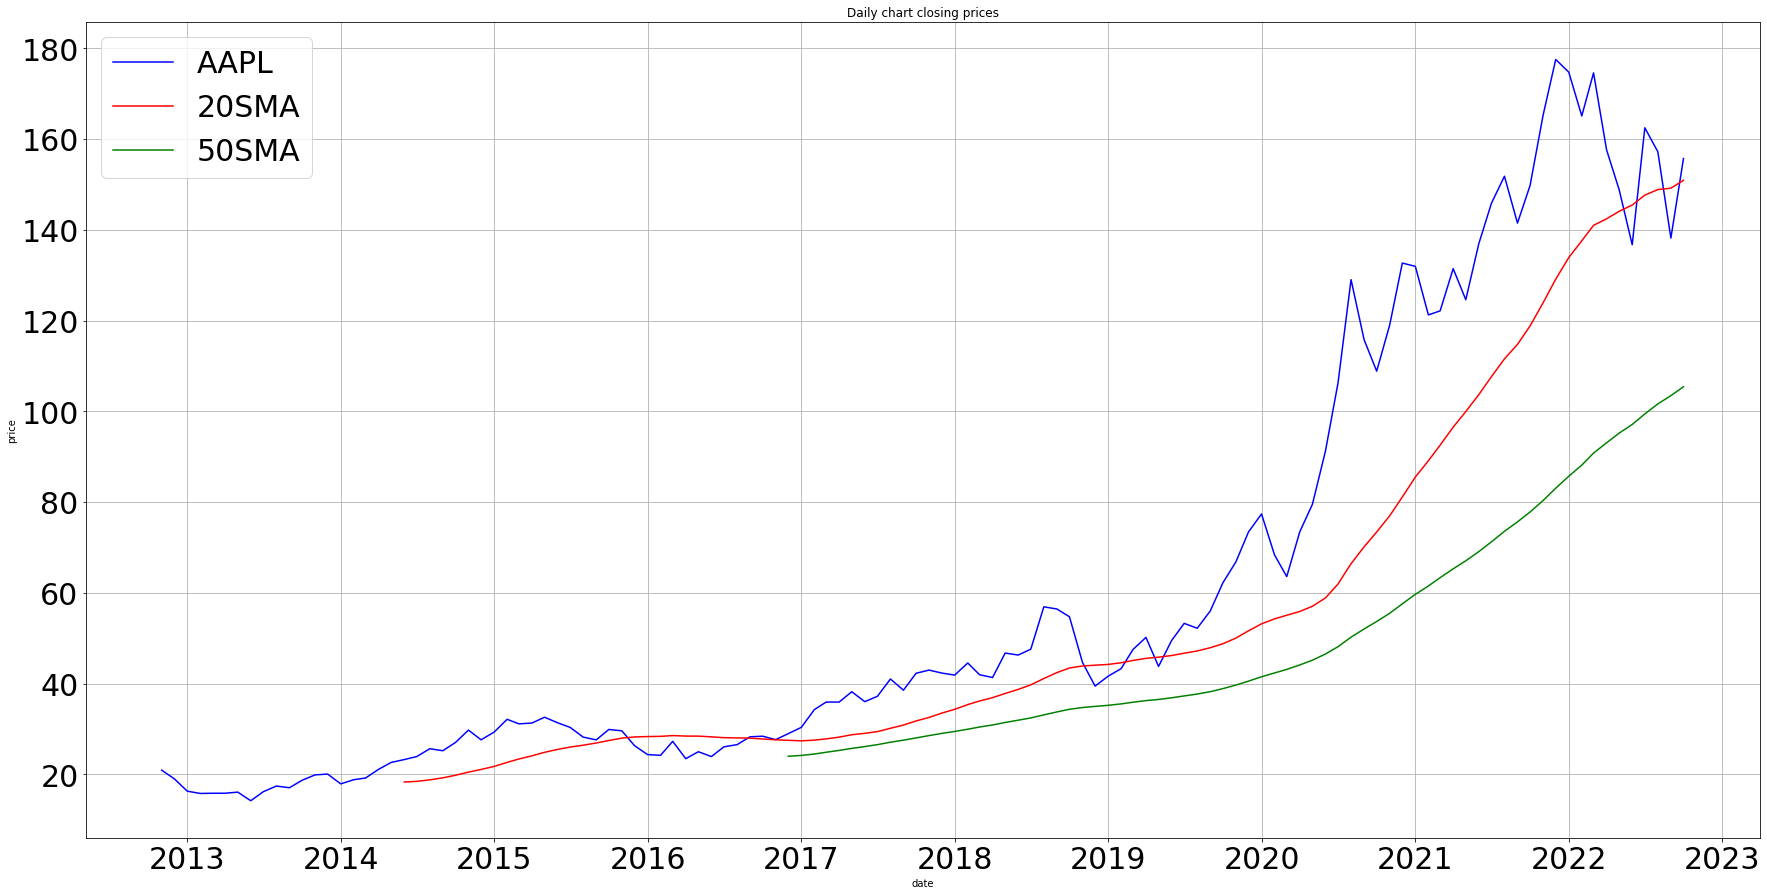

In [77]:
plt.figure(figsize=(30,15))
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

aapl_monthly_close, = plt.plot(aapl_monthly["date"], aapl_monthly["AAPL monthly"], color='blue', label="AAPL")
aapl_monthly_20SMA, = plt.plot(aapl_monthly["date"], aapl_monthly["20SMA"], color='red', label="20SMA")
aapl_monthly_50SMA, = plt.plot(aapl_monthly["date"], aapl_monthly["50SMA"], color='green', label="50SMA")
plt.grid()
plt.xlabel("date")
plt.ylabel("price")
plt.title("Daily chart closing prices")
plt.legend(fontsize = "30",loc="upper left")